# Use mapped inputs (e.g. for the velocity)

In some cases, the input velocity changes too much in the field for a fit with the same input parameters to work everywhere.

There are two possibilities : 

* **fitting smaller ROIs** and changing the input parameters accordingly (remember that the *output maps are updated at each fit, so you don't have to merge them yourself*)
* using **mapped input parameters**. This is the option we are going to show in the following.

The last possibility is particularly useful if you have already a model of you galactic disk velocity or if you have a velocity map computed with a **higher binning value than the one you want to use now (e.g. use a 10x10 binned velocity map as an input for a 1x1 velocity map)**

In [1]:
from orcs.process import SpectralCube
import pylab as pl
import orb.utils.io
import numpy as np

In [2]:
cube = SpectralCube('M57_SN3.merged.cm1.1.0.hdf5')

INFO| Data shape : (2048, 2064, 593)
INFO| Cube is in WAVENUMBER (cm-1)
INFO| Cube is CALIBRATED in wavenumber


## compute highly binned map

In [10]:
orb.core.Logger(debug=True)

cube.fit_lines_in_region('region.reg', 
                         ('[NII]6548', 'Halpha', '[NII]6583', '[SII]6716', '[SII]6731'),
                         fmodel='sincgauss', 
                         pos_def=['1','2','1','1','1'], 
                         sigma_def=['1','2','1','1','1'], 
                         sigma_cov=[10, 10],
                         binning=8, snr_guess='auto',
                         nofilter=True)

 loading region: Shape : circle ( HMS(18:53:35.739),DMS(+33:02:03.821),Ang(12.264") )



INFO| Number of spectra to fit: 70
INFO| Init of the parallel processing server with 4 threads
INFO| passed mapped kwargs : []
INFO| 10 rows to fit


 [==========] [100%] [completed in 2m17s]

INFO| Writing height maps
WARNING| param height is the same for all lines
INFO| Data written as M57_SN3.1.0.ORCS/MAPS/M57_SN3.1.0.LineMaps.map.all.8x8.height.fits in 0.01 s 
INFO| Writing height-err maps
WARNING| param height-err is the same for all lines
INFO| Data written as M57_SN3.1.0.ORCS/MAPS/M57_SN3.1.0.LineMaps.map.all.8x8.height-err.fits in 0.01 s 
INFO| Writing amplitude maps


INFO| Data written as M57_SN3.1.0.ORCS/MAPS/M57_SN3.1.0.LineMaps.map.6548.8x8.amplitude.fits in 0.01 s 
INFO| Data written as M57_SN3.1.0.ORCS/MAPS/M57_SN3.1.0.LineMaps.map.6563.8x8.amplitude.fits in 0.02 s 
INFO| Data written as M57_SN3.1.0.ORCS/MAPS/M57_SN3.1.0.LineMaps.map.6583.8x8.amplitude.fits in 0.01 s 
INFO| Data written as M57_SN3.1.0.ORCS/MAPS/M57_SN3.1.0.LineMaps.map.6716.8x8.amplitude.fits in 0.01 s 
INFO| Data written as M57_SN3.1.0.ORCS/MAPS/M57_SN3.1.0.LineMaps.map.6731.8x8.amplitude.fits in 0.01 s 
INFO| Writing amplitude-err maps
INFO| Data written as M57_SN3.1.0.ORCS/MAPS/M57_SN3.1.0.LineMaps.map.6548.8x8.amplitude-err.fits in 0.01 s 
INFO| Data written as M57_SN3.1.0.ORCS/MAPS/M57_SN3.1.0.LineMaps.map.6563.8x8.amplitude-err.fits in 0.01 s 
INFO| Data written as M57_SN3.1.0.ORCS/MAPS/M57_SN3.1.0.LineMaps.map.6583.8x8.amplitude-err.fits in 0.01 s 
INFO| Data written as M57_SN3.1.0.ORCS/MAPS/M57_SN3.1.0.LineMaps.map.6716.8x8.amplitude-err.fits in 0.01 s 
INFO| Data writ

###  Check the results


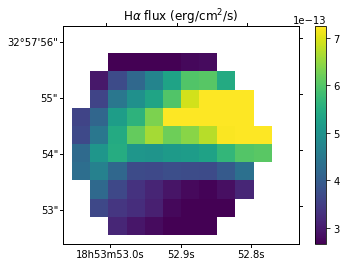

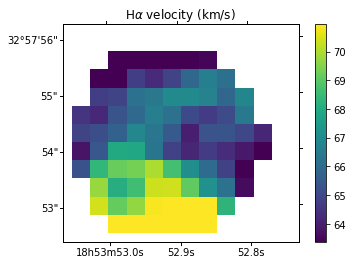

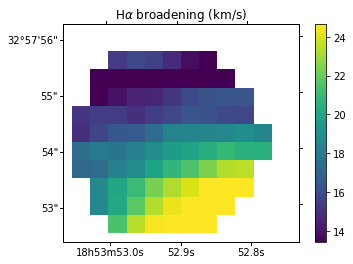

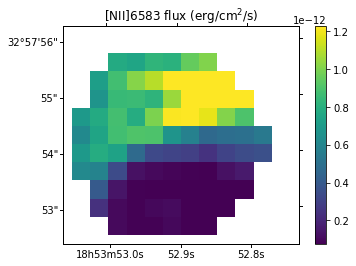

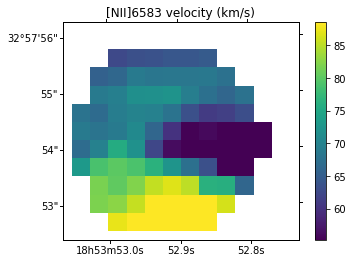

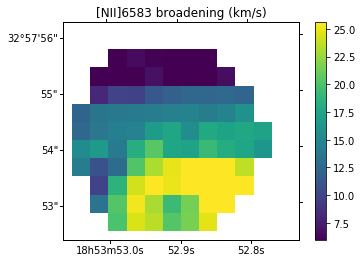

In [3]:
def show_map(path, title):
    fig = pl.figure()
    ax = fig.add_subplot(111, projection=cube.get_wcs())
    ax.coords[0].set_major_formatter('hh:mm:ss.s')
    ax.coords[1].set_major_formatter('dd:mm:ss')
    _map = orb.utils.io.read_fits(path)
    pl.imshow(_map.T, origin='bottom-left', 
              vmin=np.nanpercentile(_map, 10),
              vmax=np.nanpercentile(_map, 90))
    pl.xlim((700/8,800/8))
    pl.ylim((850/8,950/8))
    pl.colorbar()
    pl.title(title)
    
show_map('M57_SN3.1.0.ORCS/MAPS/M57_SN3.1.0.LineMaps.map.6563.8x8.flux.fits', r'H$\alpha$ flux (erg/cm$^2$/s)')
show_map('M57_SN3.1.0.ORCS/MAPS/M57_SN3.1.0.LineMaps.map.6563.8x8.velocity.fits', r'H$\alpha$ velocity (km/s)')
show_map('M57_SN3.1.0.ORCS/MAPS/M57_SN3.1.0.LineMaps.map.6563.8x8.sigma.fits', r'H$\alpha$ broadening (km/s)')

show_map('M57_SN3.1.0.ORCS/MAPS/M57_SN3.1.0.LineMaps.map.6583.8x8.flux.fits', r'[NII]6583 flux (erg/cm$^2$/s)')
show_map('M57_SN3.1.0.ORCS/MAPS/M57_SN3.1.0.LineMaps.map.6583.8x8.velocity.fits', r'[NII]6583 velocity (km/s)')
show_map('M57_SN3.1.0.ORCS/MAPS/M57_SN3.1.0.LineMaps.map.6583.8x8.sigma.fits', r'[NII]6583 broadening (km/s)')


## Compute final map with input from highly binned computation

Here, passed maps are the output of the previous computation. 

But you could have made them yourself. The only important thing is that their shape must be the same as the shape of the cube (i.e. (cube.dimx, cube.dimy)).

In [8]:
# for strange reasons, cube should be reloaded before each fit_lines_in_region process.
cube = SpectralCube('M57_SN3.merged.cm1.1.0.hdf5')

cube.fit_lines_in_region('region.reg', 
                         ('[NII]6548', 'Halpha', '[NII]6583', '[SII]6716', '[SII]6731'),
                         fmodel='sincgauss', 
                         pos_def=['1','2','1','1','1'], 
                         sigma_def=['1','2','1','1','1'], 
                         binning=1, snr_guess='auto',
                         nofilter=True,
                         pos_cov_map=['M57_SN3.1.0.ORCS/MAPS/M57_SN3.1.0.LineMaps.map.6583.8x8.velocity.fits', 
                                      'M57_SN3.1.0.ORCS/MAPS/M57_SN3.1.0.LineMaps.map.6563.8x8.velocity.fits'],
                         sigma_cov_map=['M57_SN3.1.0.ORCS/MAPS/M57_SN3.1.0.LineMaps.map.6583.8x8.sigma.fits', 
                                        'M57_SN3.1.0.ORCS/MAPS/M57_SN3.1.0.LineMaps.map.6563.8x8.sigma.fits'])

INFO| Data shape : (2048, 2064, 593)
INFO| Cube is in WAVENUMBER (cm-1)
INFO| Cube is CALIBRATED in wavenumber


 loading region: Shape : circle ( HMS(18:53:35.739),DMS(+33:02:03.821),Ang(12.264") )

WARNING| nans and infs in passed map pos_cov_map will be replaced by the median of the map


WARNING| nans and infs in passed map pos_cov_map will be replaced by the median of the map
WARNING| nans and infs in passed map sigma_cov_map will be replaced by the median of the map
WARNING| nans and infs in passed map sigma_cov_map will be replaced by the median of the map
WARNING| /home/thomas/Astro/Python/ORB/Orb/orb/fit.py:2079: UserWarning: please set a guess, or a covarying value of sigma > 0 or use a  sinc model or you might end up with nans
  warnings.warn('please set a guess, or a covarying value of sigma > 0 or use a  sinc model or you might end up with nans')

INFO| Number of spectra to fit: 4509
WARNING| /home/thomas/Astro/Python/ORB/Orcs/orcs/core.py:1742: RuntimeWarning: invalid value encountered in sqrt
  noise_counts = np.sqrt(total_counts)

WARNING| /home/thomas/Astro/Python/ORB/Orb/orb/utils/image.py:938: RuntimeWarning: Mean of empty slice
  return np.squeeze(np.nanmean(np.nanmean(im_view, axis=3), axis=1))

INFO| Init of the parallel processing server with 4 threa

 [==========] [100%] [completed in 1h8m48s]


INFO| Writing height maps
WARNING| param height is the same for all lines
INFO| Data written as M57_SN3.1.0.ORCS/MAPS/M57_SN3.1.0.LineMaps.map.all.1x1.height.fits in 0.16 s 
INFO| Writing height-err maps
WARNING| param height-err is the same for all lines
INFO| Data written as M57_SN3.1.0.ORCS/MAPS/M57_SN3.1.0.LineMaps.map.all.1x1.height-err.fits in 0.03 s 
INFO| Writing amplitude maps
INFO| Data written as M57_SN3.1.0.ORCS/MAPS/M57_SN3.1.0.LineMaps.map.6548.1x1.amplitude.fits in 0.03 s 
INFO| Data written as M57_SN3.1.0.ORCS/MAPS/M57_SN3.1.0.LineMaps.map.6563.1x1.amplitude.fits in 0.03 s 
INFO| Data written as M57_SN3.1.0.ORCS/MAPS/M57_SN3.1.0.LineMaps.map.6583.1x1.amplitude.fits in 0.03 s 
INFO| Data written as M57_SN3.1.0.ORCS/MAPS/M57_SN3.1.0.LineMaps.map.6716.1x1.amplitude.fits in 0.03 s 
INFO| Data written as M57_SN3.1.0.ORCS/MAPS/M57_SN3.1.0.LineMaps.map.6731.1x1.amplitude.fits in 0.04 s 
INFO| Writing amplitude-err maps
INFO| Data written as M57_SN3.1.0.ORCS/MAPS/M57_SN3.1.0.Li

###  Check the results


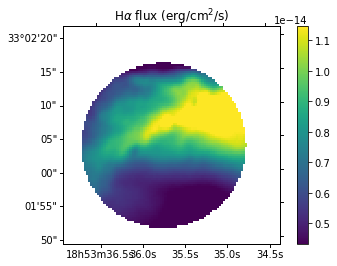

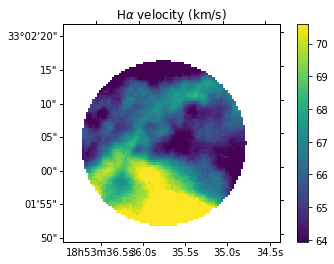

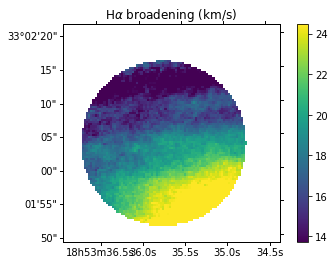

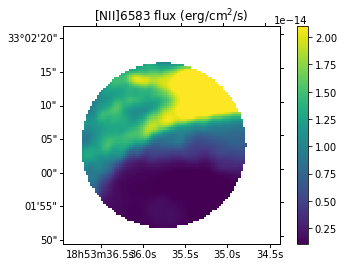

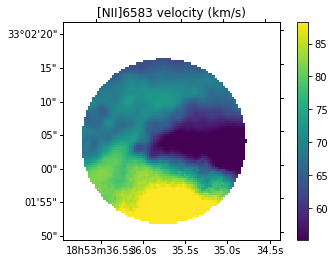

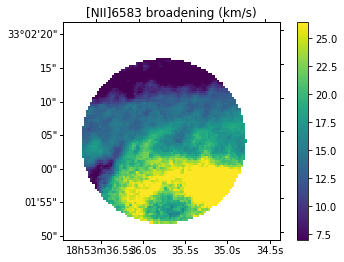

In [10]:
def show_map(path, title):
    fig = pl.figure()
    ax = fig.add_subplot(111, projection=cube.get_wcs())
    ax.coords[0].set_major_formatter('hh:mm:ss.s')
    ax.coords[1].set_major_formatter('dd:mm:ss')
    _map = orb.utils.io.read_fits(path)
    pl.imshow(_map.T, origin='bottom-left', 
              vmin=np.nanpercentile(_map, 10),
              vmax=np.nanpercentile(_map, 90))
    pl.xlim((700,800))
    pl.ylim((850,950))
    pl.colorbar()
    pl.title(title)
    
show_map('M57_SN3.1.0.ORCS/MAPS/M57_SN3.1.0.LineMaps.map.6563.1x1.flux.fits', r'H$\alpha$ flux (erg/cm$^2$/s)')
show_map('M57_SN3.1.0.ORCS/MAPS/M57_SN3.1.0.LineMaps.map.6563.1x1.velocity.fits', r'H$\alpha$ velocity (km/s)')
show_map('M57_SN3.1.0.ORCS/MAPS/M57_SN3.1.0.LineMaps.map.6563.1x1.sigma.fits', r'H$\alpha$ broadening (km/s)')

show_map('M57_SN3.1.0.ORCS/MAPS/M57_SN3.1.0.LineMaps.map.6583.1x1.flux.fits', r'[NII]6583 flux (erg/cm$^2$/s)')
show_map('M57_SN3.1.0.ORCS/MAPS/M57_SN3.1.0.LineMaps.map.6583.1x1.velocity.fits', r'[NII]6583 velocity (km/s)')
show_map('M57_SN3.1.0.ORCS/MAPS/M57_SN3.1.0.LineMaps.map.6583.1x1.sigma.fits', r'[NII]6583 broadening (km/s)')
